In [121]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import koreanize_matplotlib
import folium
import geopandas as gpd

grid = gpd.read_file('./data/(B100)국토통계_건축물-건축면적-(격자) 10KM_전국_202312/')
grid =  grid.to_crs('EPSG:4326')
map_df = gpd.read_file('./data/전국지도_5179/')
map_df =  map_df.to_crs('EPSG:4326')
final_merge = pd.read_csv('./data/final_merge.csv')
road = pd.read_csv('./data/도로데이터/도로데이터/전국도로 + 데이터/road_csv.csv', encoding='cp949')

In [133]:
final_merge

,위도,경도,발생건수,생태통로수,종분류,cluster
0,37.340987,127.912591,1.0,0.0,0.0,0
1,37.340987,127.912591,1.0,0.0,0.0,0
2,37.340987,127.912591,1.0,0.0,0.0,0
3,37.340987,127.912591,1.0,0.0,0.0,0
4,37.340987,127.912591,1.0,0.0,0.0,0
...,...,...,...,...,...,...
1847,35.380038,127.381146,0.0,0.0,1.0,-1
1848,35.388915,127.493202,0.0,0.0,1.0,-1
1849,35.113058,128.969297,0.0,0.0,1.0,-1
1850,34.486423,126.468668,0.0,0.0,1.0,-1


In [132]:
g_final=gpd.GeoDataFrame(final_merge, geometry=gpd.points_from_xy(final_merge.경도, final_merge.위도), crs='EPSG:4326')

In [134]:
grid

,gid,lbl,val,geometry
0,ë§ë°28,114.43,114.43,"POLYGON ((128.84707 36.91071, 128.84866 37.000..."
1,ëë¤79,96.73,96.73,"POLYGON ((126.08742 34.29542, 126.08591 34.385..."
2,ë¤ë°78,428.60,428.60,"POLYGON ((127.16319 36.91788, 127.16280 37.008..."
3,ë¤ë27,116.94,116.94,"POLYGON ((126.64151 33.21829, 126.64062 33.308..."
4,ë¤ë¼61,134.62,134.62,"POLYGON ((127.06437 34.48315, 127.06390 34.573..."
...,...,...,...,...
1350,ë¼ì63,None,NaN,"POLYGON ((128.18590 38.26838, 128.18674 38.358..."
1351,ë¼ì23,None,NaN,"POLYGON ((127.72864 38.27016, 127.72892 38.360..."
1352,ëë§92,None,NaN,"POLYGON ((126.28760 35.46976, 126.28625 35.559..."
1353,ê°ì¬48,None,NaN,"POLYGON ((124.54765 37.78273, 124.54406 37.872..."


In [135]:
g_final

,위도,경도,발생건수,생태통로수,종분류,cluster,geometry
0,37.340987,127.912591,1.0,0.0,0.0,0,POINT (127.91259 37.34099)
1,37.340987,127.912591,1.0,0.0,0.0,0,POINT (127.91259 37.34099)
2,37.340987,127.912591,1.0,0.0,0.0,0,POINT (127.91259 37.34099)
3,37.340987,127.912591,1.0,0.0,0.0,0,POINT (127.91259 37.34099)
4,37.340987,127.912591,1.0,0.0,0.0,0,POINT (127.91259 37.34099)
...,...,...,...,...,...,...,...
1847,35.380038,127.381146,0.0,0.0,1.0,-1,POINT (127.38115 35.38004)
1848,35.388915,127.493202,0.0,0.0,1.0,-1,POINT (127.49320 35.38891)
1849,35.113058,128.969297,0.0,0.0,1.0,-1,POINT (128.96930 35.11306)
1850,34.486423,126.468668,0.0,0.0,1.0,-1,POINT (126.46867 34.48642)


In [141]:
final_grid = gpd.sjoin(grid, g_final[['cluster','geometry']],how='left',op='contains')

In [137]:
final_grid

,gid,lbl,val,geometry,index_right,cluster
0,ë§ë°28,114.43,114.43,"POLYGON ((128.84707 36.91071, 128.84866 37.000...",NaN,NaN
1,ëë¤79,96.73,96.73,"POLYGON ((126.08742 34.29542, 126.08591 34.385...",NaN,NaN
2,ë¤ë°78,428.60,428.60,"POLYGON ((127.16319 36.91788, 127.16280 37.008...",NaN,NaN
3,ë¤ë27,116.94,116.94,"POLYGON ((126.64151 33.21829, 126.64062 33.308...",1080.0,-1.0
4,ë¤ë¼61,134.62,134.62,"POLYGON ((127.06437 34.48315, 127.06390 34.573...",NaN,NaN
...,...,...,...,...,...,...
1350,ë¼ì63,None,NaN,"POLYGON ((128.18590 38.26838, 128.18674 38.358...",NaN,NaN
1351,ë¼ì23,None,NaN,"POLYGON ((127.72864 38.27016, 127.72892 38.360...",NaN,NaN
1352,ëë§92,None,NaN,"POLYGON ((126.28760 35.46976, 126.28625 35.559...",NaN,NaN
1353,ê°ì¬48,None,NaN,"POLYGON ((124.54765 37.78273, 124.54406 37.872...",NaN,NaN


In [142]:
grid_mode_10 = final_grid['cluster'].groupby(final_grid['gid']).apply(lambda x: x.mode().iloc[0])
final_10 = grid.merge(grid_mode_10, on='gid')
final_10.rename(columns={'gid': 'adm'}, inplace=True)

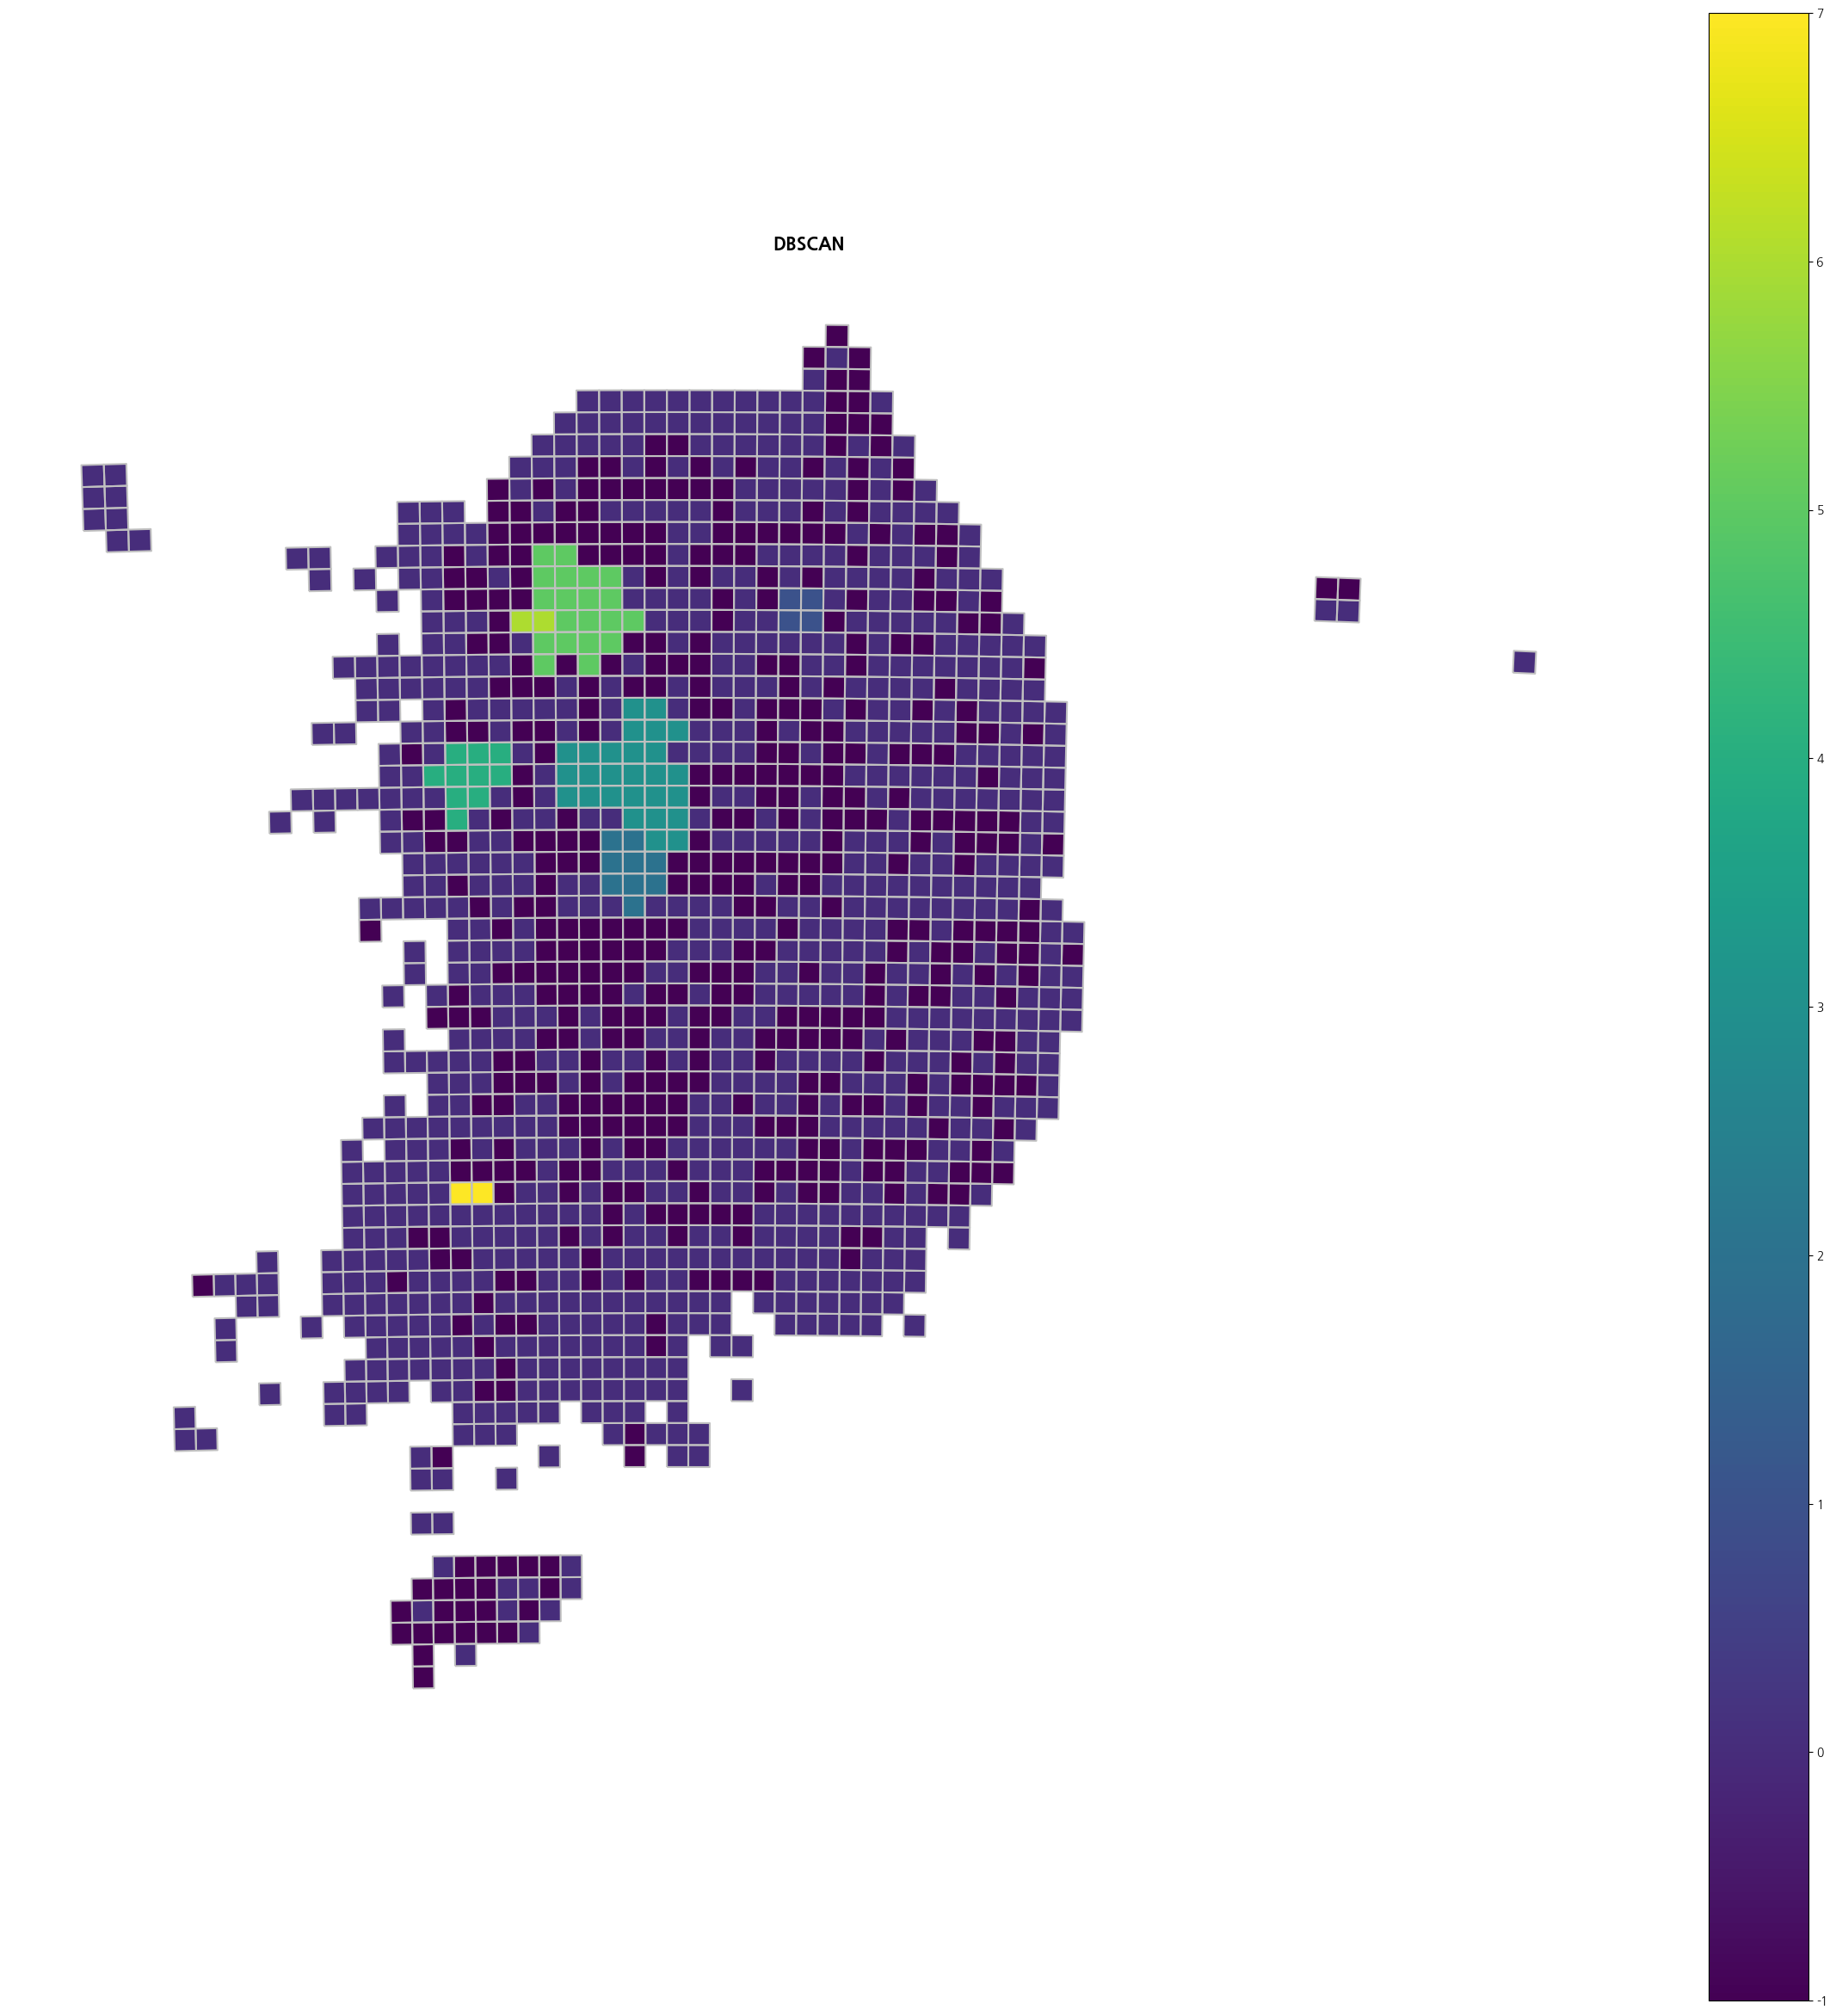

In [157]:
f,ax = plt.subplots(figsize=(30,30))

final_10.plot(column='cluster', legend=True, ax=ax, cmap = 'viridis') # 분위수
final_10.boundary.plot(ax=ax, color='silver')
ax.set_title("DBSCAN", fontsize=15, fontweight='bold')
ax.axis('off')

plt.show()

<Figure size 1000x1000 with 0 Axes>

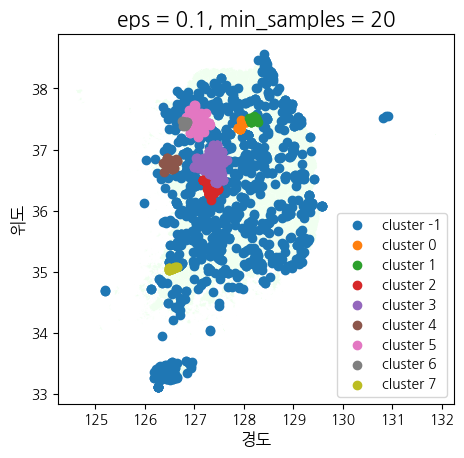

In [130]:
# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.1, min_samples=20)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(final_merge[['위도','경도']])
final_merge['cluster'] = model.fit_predict(final_merge[['위도','경도']])

plt.figure(figsize = (10, 10))
map_df.plot(color='honeydew')
# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, final_merge['cluster'].max() + 1):
    plt.scatter(final_merge.loc[final_merge['cluster'] == i, '경도'], final_merge.loc[final_merge['cluster'] == i, '위도'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.1, min_samples = 20', size = 15)
plt.xlabel('경도', size = 12)
plt.ylabel('위도', size = 12)
plt.show()

In [131]:
final_merge[final_merge['cluster']==-1].describe() # 다 적은 곳

,위도,경도,발생건수,생태통로수,종분류,cluster
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.0
mean,36.247989,127.702192,0.178315,0.392473,0.707885,-1.0
std,1.214397,0.872503,0.382950,0.488520,0.946445,0.0
min,33.113537,125.191948,0.000000,0.000000,0.000000,-1.0
25%,35.423256,127.023669,0.000000,0.000000,0.000000,-1.0
50%,36.151056,127.614374,0.000000,0.000000,0.000000,-1.0
75%,37.249148,128.409650,0.000000,1.000000,1.000000,-1.0
max,38.558094,130.905917,1.000000,1.000000,3.000000,-1.0


In [67]:
final_merge[final_merge['cluster']==0].describe() # 로드킬 발생 지역 생태통로, 동물 거의 없음

,위도,경도,발생건수,생태통로수,종분류,cluster
count,32.000000,32.000000,32.000000,32.000000,32.00000,32.0
mean,37.365165,127.926456,0.937500,0.031250,0.09375,0.0
std,0.043696,0.044131,0.245935,0.176777,0.53033,0.0
min,37.340987,127.871431,0.000000,0.000000,0.00000,0.0
25%,37.340987,127.912591,1.000000,0.000000,0.00000,0.0
50%,37.340987,127.912591,1.000000,0.000000,0.00000,0.0
75%,37.359898,127.921478,1.000000,0.000000,0.00000,0.0
max,37.487997,128.036012,1.000000,1.000000,3.00000,0.0


In [68]:
final_merge[final_merge['cluster']==1].describe() # 동물과 로드킬 발생 없이 생태통로 있는 곳

,위도,경도,발생건수,생태통로수,종분류,cluster
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,37.480516,128.170350,0.333333,0.185185,0.666667,1.0
std,0.025655,0.044211,0.480384,0.395847,0.784465,0.0
min,37.453441,128.094428,0.000000,0.000000,0.000000,1.0
25%,37.459174,128.143256,0.000000,0.000000,0.000000,1.0
50%,37.475471,128.149267,0.000000,0.000000,0.000000,1.0
75%,37.500045,128.205283,1.000000,0.000000,1.000000,1.0
max,37.542081,128.273577,1.000000,1.000000,2.000000,1.0


In [69]:
final_merge[final_merge['cluster']==2].describe() # 로드킬 발생 많지만 생태통로 적음

,위도,경도,발생건수,생태통로수,종분류,cluster
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,36.369553,127.309058,0.876923,0.061538,0.123077,2.0
std,0.081679,0.075972,0.331082,0.242186,0.515621,0.0
min,36.181099,127.165489,0.000000,0.000000,0.000000,2.0
25%,36.294078,127.288316,1.000000,0.000000,0.000000,2.0
50%,36.349629,127.292140,1.000000,0.000000,0.000000,2.0
75%,36.427872,127.338589,1.000000,0.000000,0.000000,2.0
max,36.497571,127.466302,1.000000,1.000000,3.000000,2.0


In [70]:
final_merge[final_merge['cluster']==3].describe() # 로드킬과 생태통로 없지만 고라니 있는 곳

,위도,경도,발생건수,생태통로수,종분류,cluster
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.0
mean,36.758601,127.372374,0.495495,0.184685,0.590090,3.0
std,0.141601,0.143604,0.501110,0.388918,0.983341,0.0
min,36.447816,126.997055,0.000000,0.000000,0.000000,3.0
25%,36.625360,127.281484,0.000000,0.000000,0.000000,3.0
50%,36.761449,127.423166,0.000000,0.000000,0.000000,3.0
75%,36.840750,127.471406,1.000000,0.000000,1.000000,3.0
max,37.077452,127.659944,1.000000,1.000000,3.000000,3.0


In [274]:
final_merge[final_merge['cluster']==5].describe() # 

,위도,경도,발생건수,생태통로수,종분류,cluster
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.0
mean,37.417545,127.083678,0.046512,0.106312,2.335548,5.0
std,0.076032,0.079198,0.210941,0.308750,1.097132,0.0
min,37.204078,126.830989,0.000000,0.000000,0.000000,5.0
25%,37.375250,127.044278,0.000000,0.000000,2.000000,5.0
50%,37.395122,127.090252,0.000000,0.000000,3.000000,5.0
75%,37.446267,127.135556,0.000000,0.000000,3.000000,5.0
max,37.726833,127.316567,1.000000,1.000000,3.000000,5.0


In [73]:
final_merge[final_merge['cluster']==6].describe()

,위도,경도,발생건수,생태통로수,종분류,cluster
count,16.000000,16.000000,16.000,16.000000,16.0000,16.0
mean,37.434434,126.809173,0.625,0.312500,0.1875,6.0
std,0.026524,0.026978,0.500,0.478714,0.7500,0.0
min,37.377778,126.758209,0.000,0.000000,0.0000,6.0
25%,37.419086,126.796623,0.000,0.000000,0.0000,6.0
50%,37.437222,126.797441,1.000,0.000000,0.0000,6.0
75%,37.455703,126.828963,1.000,1.000000,0.0000,6.0
max,37.470810,126.856872,1.000,1.000000,3.0000,6.0


In [272]:
final_merge[final_merge['cluster']==7].describe()

,위도,경도,발생건수,생태통로수,종분류,cluster
count,21.000000,21.000000,21.000000,21.000000,21.0,21.0
mean,35.057395,126.550364,0.666667,0.333333,0.0,7.0
std,0.015931,0.054306,0.483046,0.483046,0.0,0.0
min,35.030325,126.479639,0.000000,0.000000,0.0,7.0
25%,35.046825,126.489623,0.000000,0.000000,0.0,7.0
50%,35.064954,126.555997,1.000000,0.000000,0.0,7.0
75%,35.066781,126.587701,1.000000,1.000000,0.0,7.0
max,35.079469,126.639656,1.000000,1.000000,0.0,7.0


In [233]:
rk = pd.read_csv('./data/로드킬 위도_경도.csv', encoding='cp949')
rk=gpd.GeoDataFrame(rk, geometry=gpd.points_from_xy(rk.경도, rk.위도), crs='EPSG:4326')
rk['num']=1

In [234]:
rk = gpd.sjoin(grid, rk[['num','geometry']],how='left',op='contains').fillna(0)
rk

,gid,lbl,val,geometry,index_right,num
0,ë§ë°28,114.43,114.43,"POLYGON ((128.84707 36.91071, 128.84866 37.000...",0.0,0.0
1,ëë¤79,96.73,96.73,"POLYGON ((126.08742 34.29542, 126.08591 34.385...",0.0,0.0
2,ë¤ë°78,428.60,428.60,"POLYGON ((127.16319 36.91788, 127.16280 37.008...",0.0,0.0
3,ë¤ë27,116.94,116.94,"POLYGON ((126.64151 33.21829, 126.64062 33.308...",0.0,0.0
4,ë¤ë¼61,134.62,134.62,"POLYGON ((127.06437 34.48315, 127.06390 34.573...",0.0,0.0
...,...,...,...,...,...,...
1350,ë¼ì63,0,0.00,"POLYGON ((128.18590 38.26838, 128.18674 38.358...",0.0,0.0
1351,ë¼ì23,0,0.00,"POLYGON ((127.72864 38.27016, 127.72892 38.360...",0.0,0.0
1352,ëë§92,0,0.00,"POLYGON ((126.28760 35.46976, 126.28625 35.559...",0.0,0.0
1353,ê°ì¬48,0,0.00,"POLYGON ((124.54765 37.78273, 124.54406 37.872...",0.0,0.0


In [238]:
rk_sum = rk['num'].groupby([rk['gid']]).sum()
rk_grid = grid.merge(rk_sum, on='gid')
rk_grid=rk_grid[rk_grid['num']>0]

In [239]:
rec = gpd.read_file('./data/전체 우선설치지역/')
rec =  rec.to_crs('EPSG:4326')

In [240]:
final_10

,adm,lbl,val,geometry,cluster,color
0,ë§ë°28,114.43,114.43,"POLYGON ((128.84707 36.91071, 128.84866 37.000...",0.0,blue
1,ëë¤79,96.73,96.73,"POLYGON ((126.08742 34.29542, 126.08591 34.385...",0.0,blue
2,ë¤ë°78,428.60,428.60,"POLYGON ((127.16319 36.91788, 127.16280 37.008...",0.0,blue
3,ë¤ë27,116.94,116.94,"POLYGON ((126.64151 33.21829, 126.64062 33.308...",-1.0,red
4,ë¤ë¼61,134.62,134.62,"POLYGON ((127.06437 34.48315, 127.06390 34.573...",0.0,blue
...,...,...,...,...,...,...
1350,ë¼ì63,None,NaN,"POLYGON ((128.18590 38.26838, 128.18674 38.358...",0.0,blue
1351,ë¼ì23,None,NaN,"POLYGON ((127.72864 38.27016, 127.72892 38.360...",0.0,blue
1352,ëë§92,None,NaN,"POLYGON ((126.28760 35.46976, 126.28625 35.559...",0.0,blue
1353,ê°ì¬48,None,NaN,"POLYGON ((124.54765 37.78273, 124.54406 37.872...",0.0,blue


In [248]:
df1 = gpd.sjoin(final_10, rk_grid, how='right', op="contains")
df = pd.merge(df1, rec, on='geometry', how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
df

,index_left,adm,lbl_left,val_left,cluster,color,gid,lbl_right,val_right,geometry,num,SPO_NO_CD,SECT_CD,NUMPOINTS,layer,path
0,9,ë¤ë¼69,178.58,178.58,-1.0,red,ë¤ë¼69,178.58,178.58,"POLYGON ((127.06056 35.20454, 127.06007 35.294...",3.0,NaN,NaN,NaN,NaN,NaN
1,10,ë¼ì¬64,164.01,164.01,1.0,green,ë¼ì¬64,164.01,164.01,"POLYGON ((128.17842 37.45725, 128.17923 37.547...",6.0,NaN,NaN,NaN,NaN,NaN
2,25,ë¼ì¬32,203.39,203.39,0.0,blue,ë¼ì¬32,203.39,203.39,"POLYGON ((127.83841 37.27844, 127.83881 37.368...",24.0,NaN,NaN,NaN,NaN,NaN
5,30,ë¼ì¬28,193.26,193.26,-1.0,red,ë¼ì¬28,193.26,193.26,"POLYGON ((127.72724 37.81952, 127.72752 37.909...",6.0,NaN,NaN,NaN,NaN,NaN
6,52,ë¤ì¬53,529.39,529.39,5.0,NaN,ë¤ì¬53,529.39,529.39,"POLYGON ((126.93532 37.36772, 126.93465 37.457...",4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1185,ë¼ë¼16,167.21,167.21,-1.0,red,ë¼ë¼16,167.21,167.21,"POLYGON ((127.60950 34.93477, 127.60962 35.024...",3.0,NaN,NaN,NaN,NaN,NaN
130,1199,ë¤ë§21,197.85,197.85,-1.0,red,ë¤ë§21,197.85,197.85,"POLYGON ((126.61920 35.38247, 126.61821 35.472...",6.0,NaN,NaN,NaN,NaN,NaN
131,1202,ë¤ë§70,231.68,231.68,-1.0,red,ë¤ë§70,231.68,231.68,"POLYGON ((127.17005 35.29506, 127.16968 35.385...",3.0,NaN,NaN,NaN,NaN,NaN
132,1225,ë¤ë°96,348.42,348.42,3.0,NaN,ë¤ë°96,348.42,348.42,"POLYGON ((127.38799 36.73801, 127.38786 36.828...",9.0,NaN,NaN,NaN,NaN,NaN


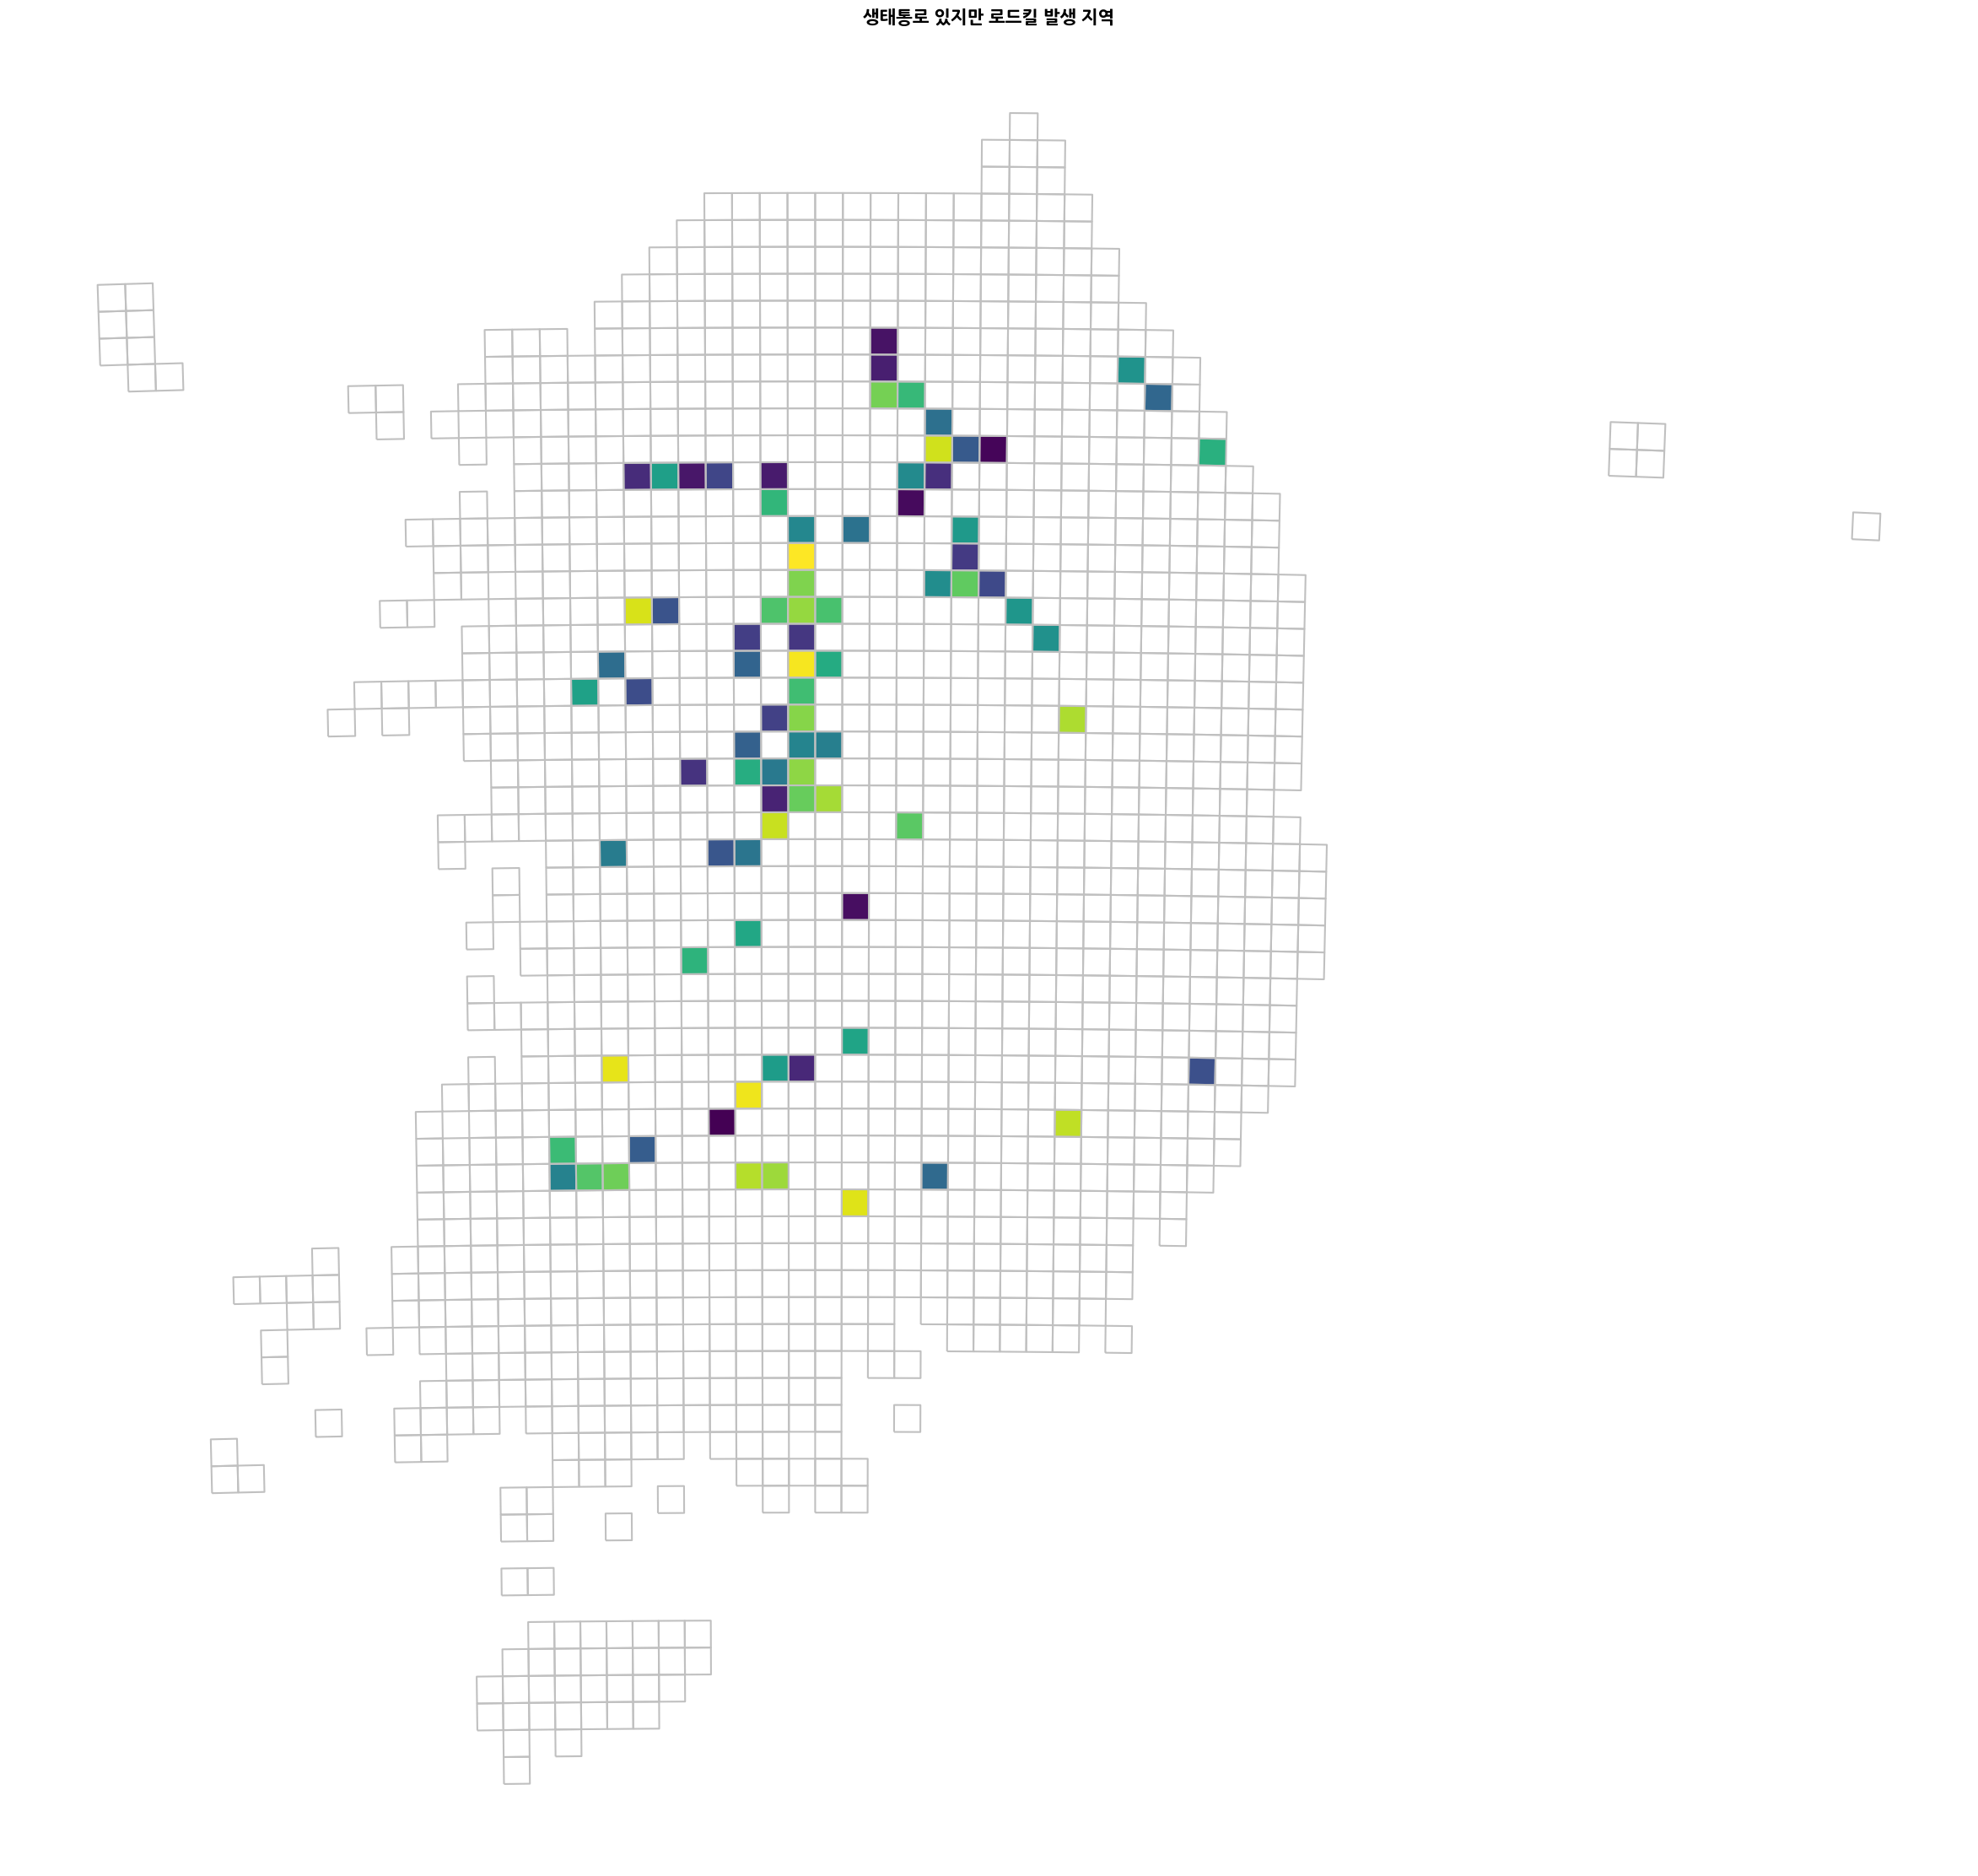

In [268]:
f,ax = plt.subplots(figsize=(30,30))

rk_grid.plot(legend=True, ax=ax, cmap = 'viridis') # 분위수
grid.boundary.plot(ax=ax, color='silver')
ax.set_title("생태통로 있지만 로드킬 발생 지역", fontsize=15, fontweight='bold')
ax.axis('off')

plt.show()

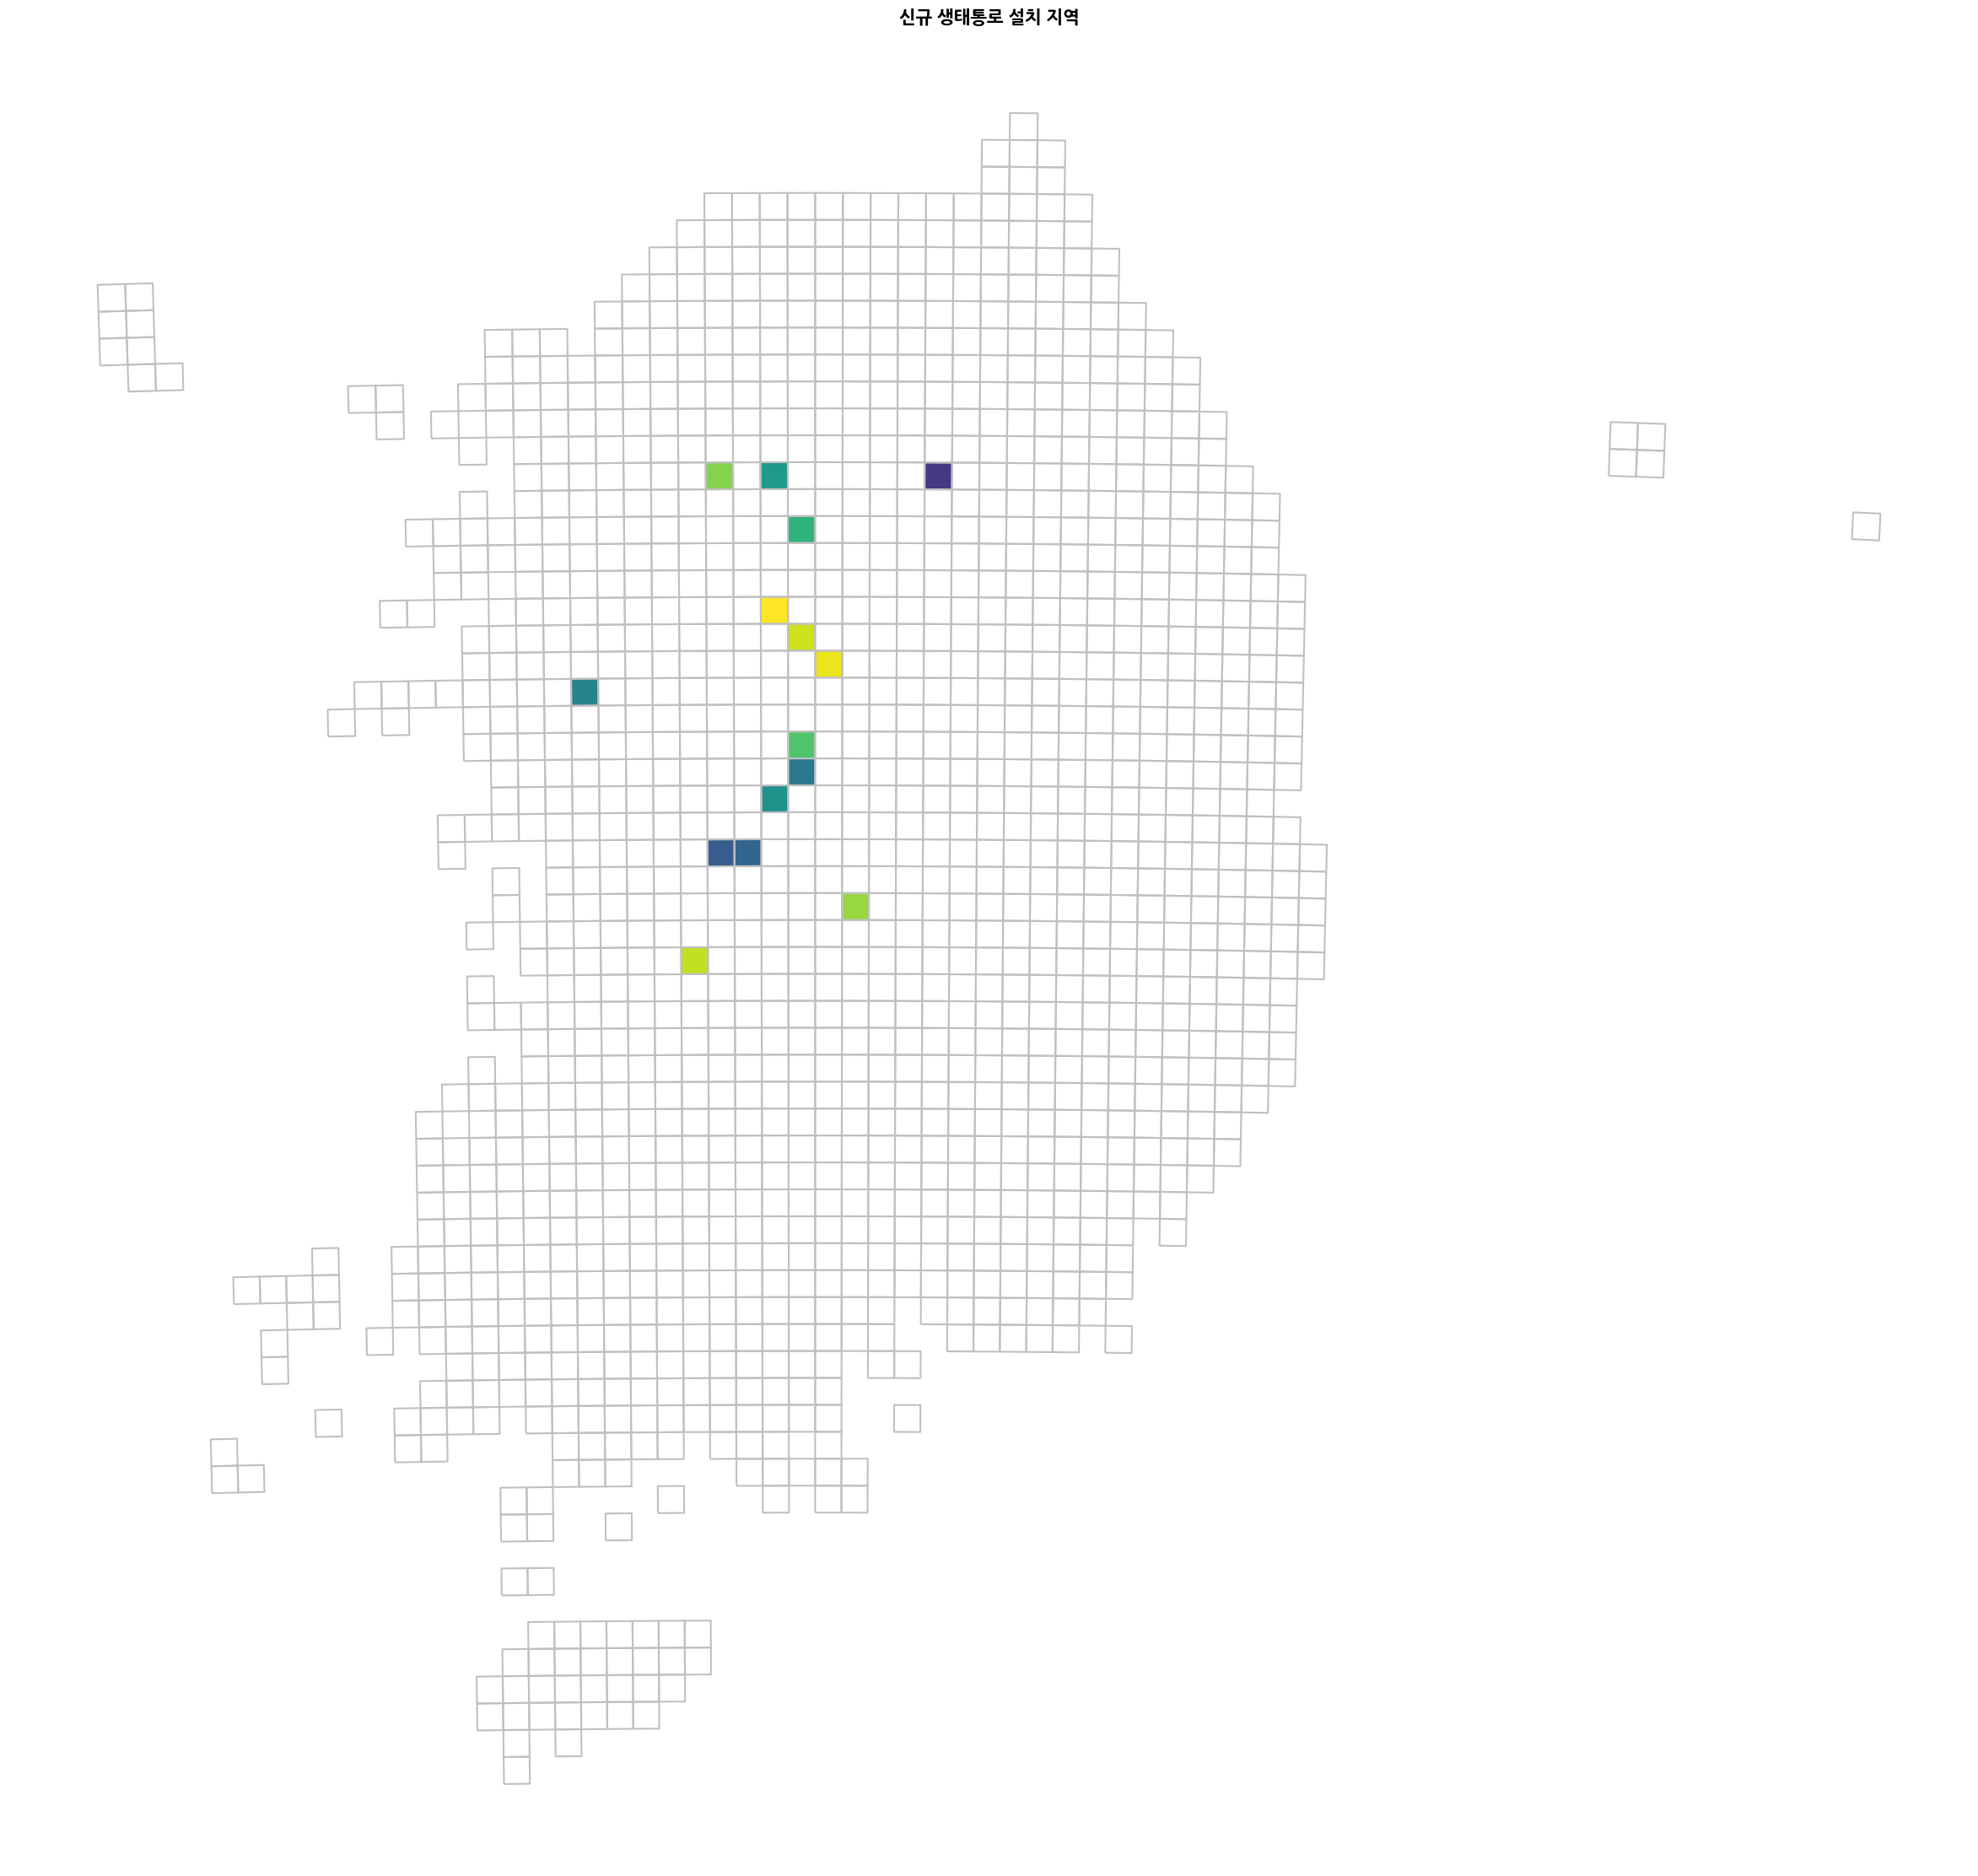

In [271]:
f,ax = plt.subplots(figsize=(30,30))

rec.plot(legend=True, ax=ax, cmap = 'viridis') # 분위수
grid.boundary.plot(ax=ax, color='silver')
ax.set_title("신규 생태통로 설치 지역", fontsize=15, fontweight='bold')
ax.axis('off')

plt.show()

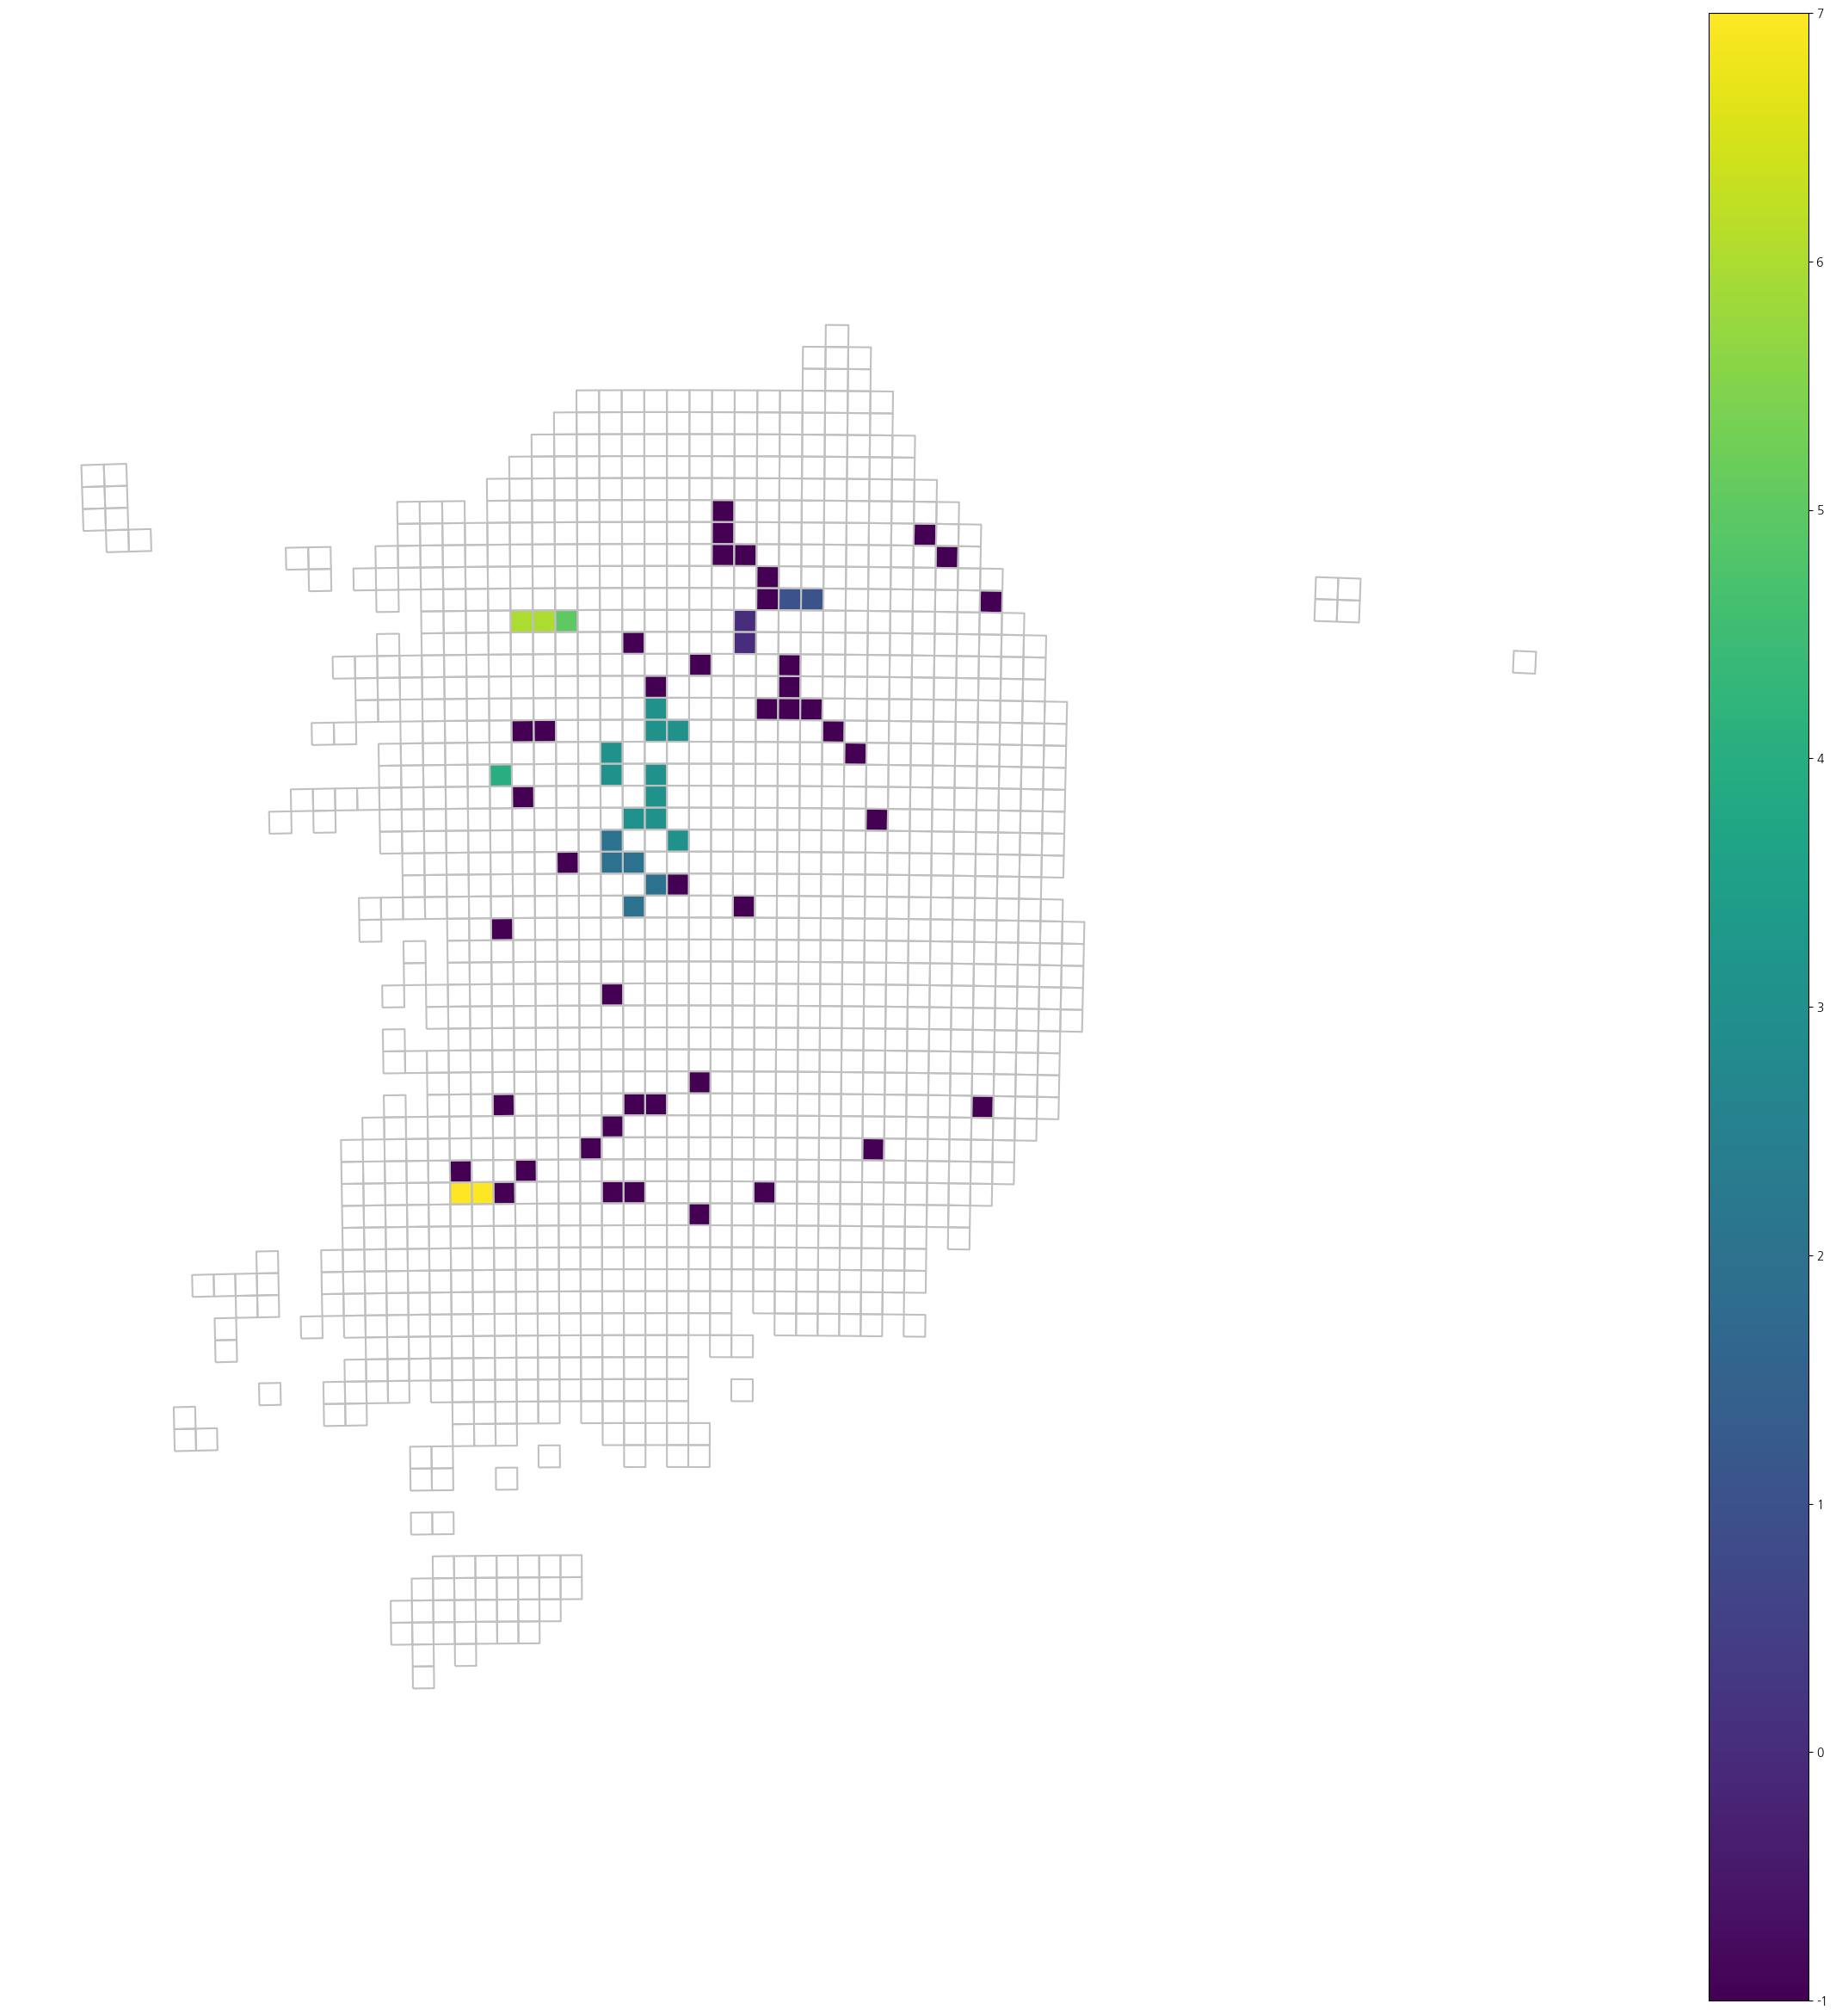

In [270]:
f,ax = plt.subplots(figsize=(30,30))

df.plot(column='cluster', legend=True, ax=ax, cmap = 'viridis') # 분위수
grid.boundary.plot(ax=ax, color='silver')
ax.axis('off')

plt.show()

In [275]:
data = df[(df['cluster']==1)|(df['cluster']==3)|(df['cluster']==6)|(df['cluster']==7)]

In [293]:
df[df['cluster']==7].geometry

KeyError: 0

In [296]:
latitude_mean = df[df['cluster']==7]['geometry'].centroid
longitude_mean = df[df['cluster']==7]['geometry'].centroid

In [297]:
latitude_mean

62     POINT (126.45811 35.06560)
107    POINT (126.56777 35.06650)
dtype: geometry

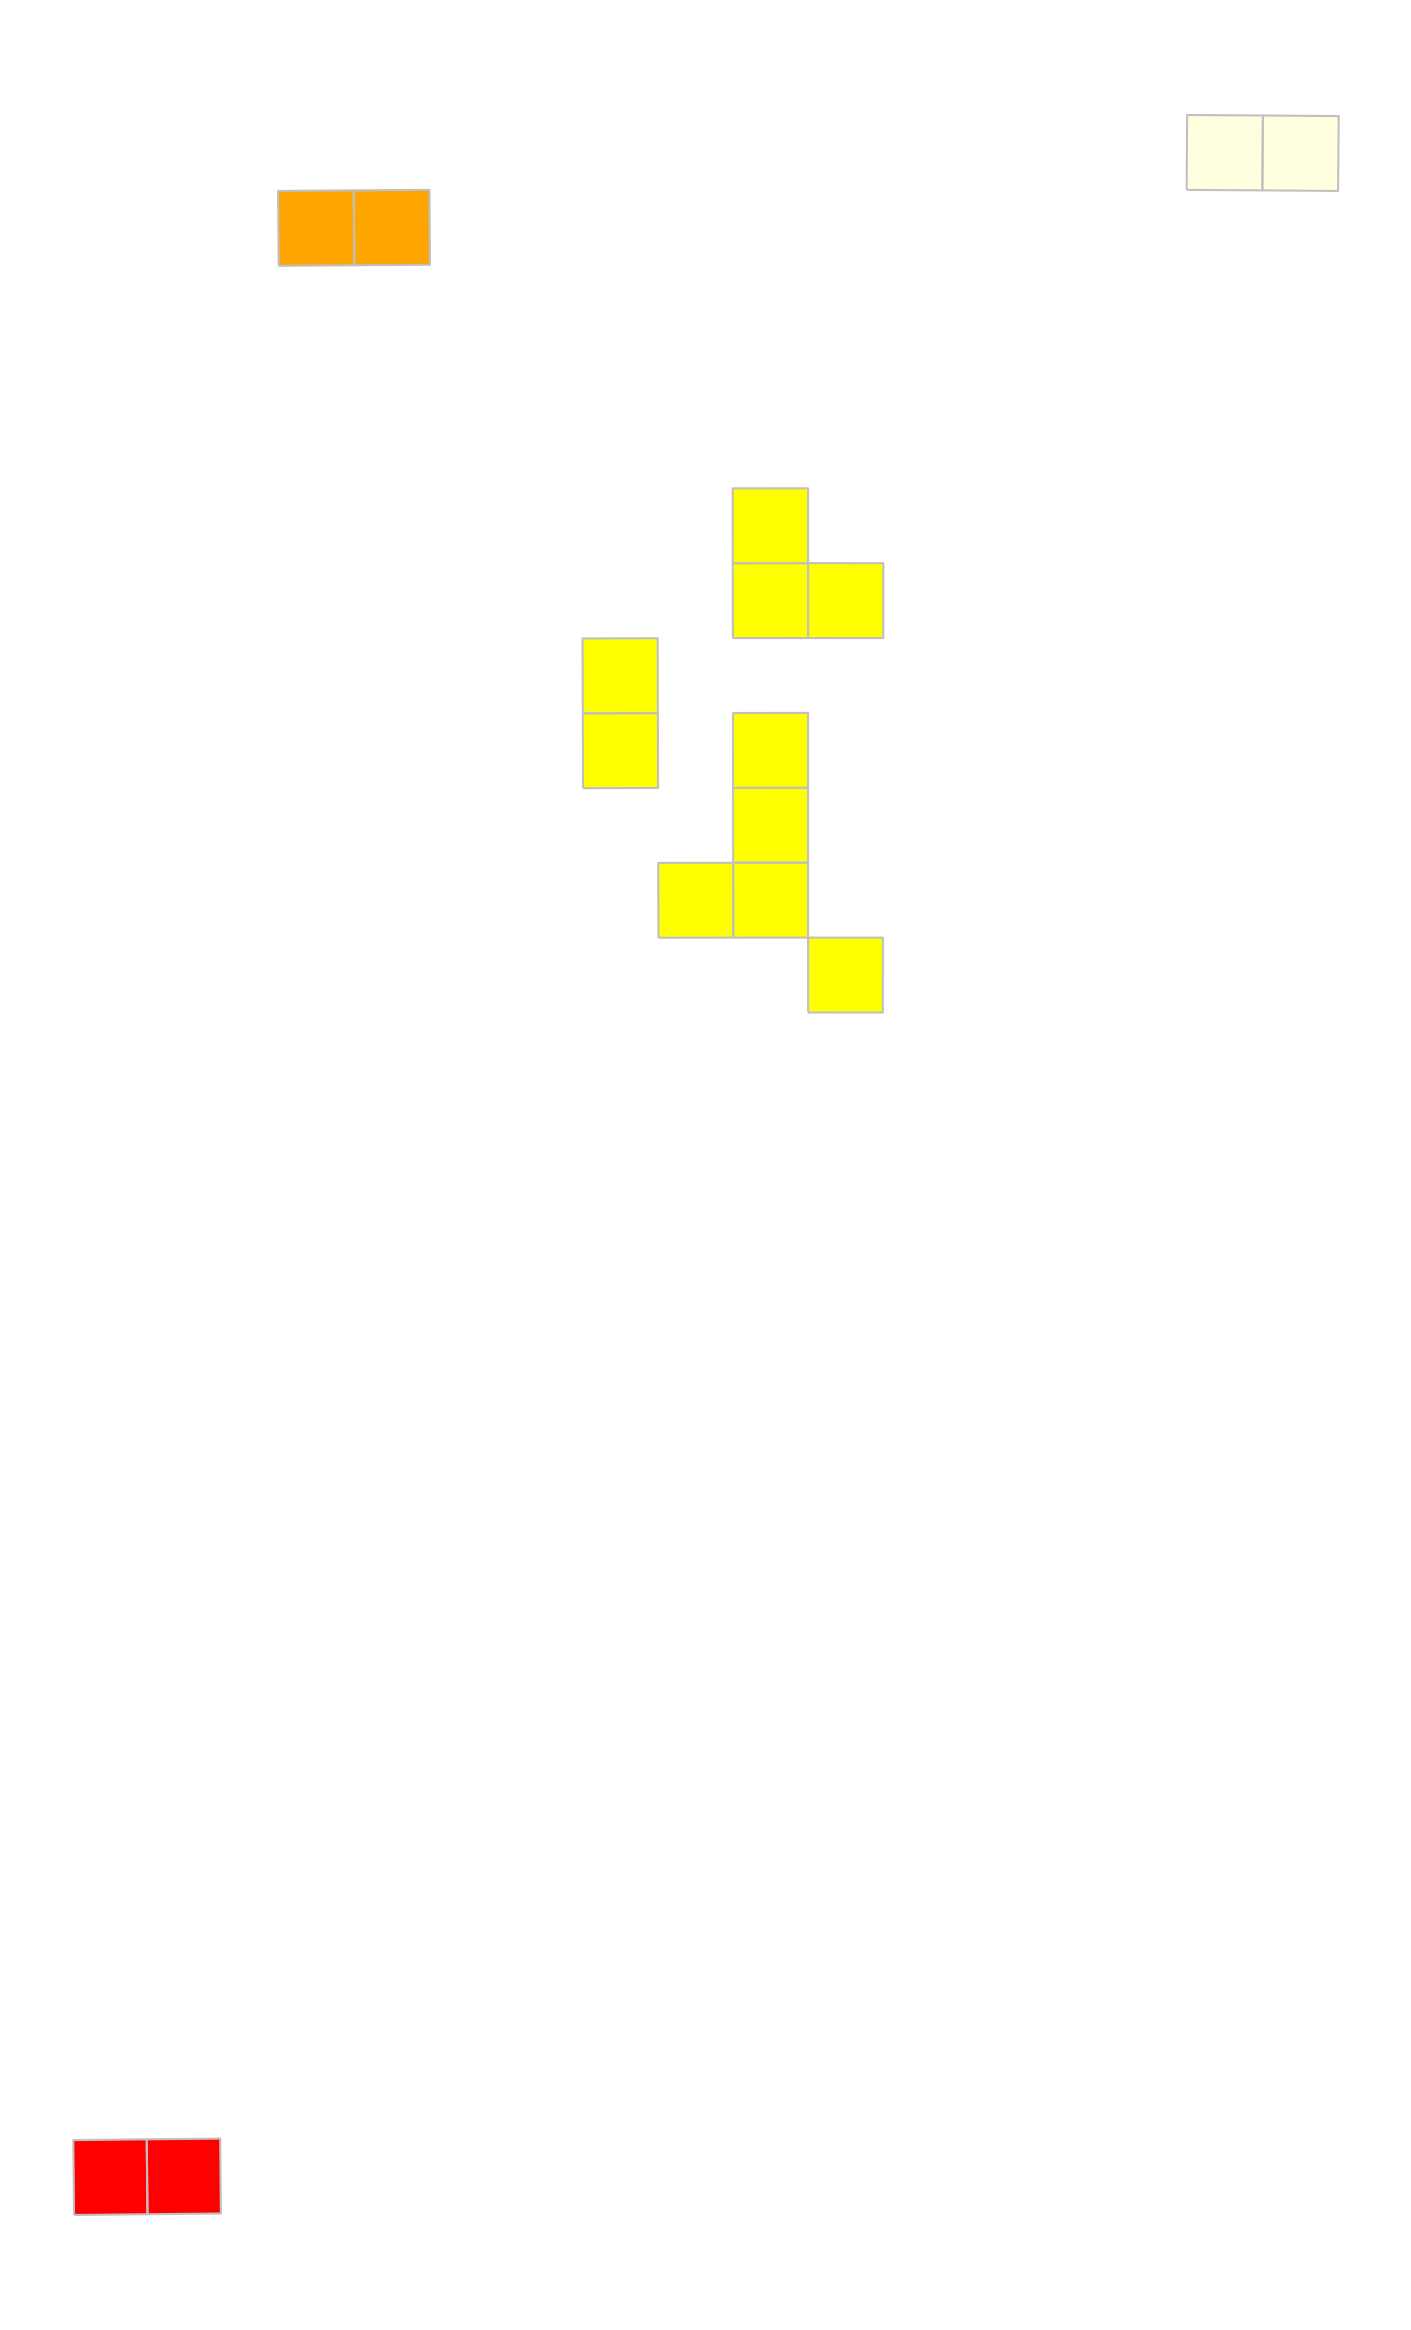

In [289]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(30,30))

# 클러스터 값에 따라 수동으로 색상을 매핑합니다.
color_mapping = {7: 'red', 6: 'orange', 3: 'yellow', 1: 'lightyellow'}
data['color'] = data['cluster'].map(color_mapping)

# 'color' 컬럼을 사용하여 데이터를 색상으로 플로팅합니다.
data.plot(ax=ax, color=data['color'])
data.boundary.plot(ax=ax, color='silver')
ax.axis('off')

plt.show()

In [277]:
# 라이브러리 호출
import gpxpy
import pandas as pd
import os
from glob import glob
import geopandas
from datetime import datetime

# GeoDataFrame을 Shapefile로 저장
data.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
data.to_file('./data/data.shp', driver='ESRI Shapefile')

In [279]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 16 entries, 1 to 132
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index_left  16 non-null     int64   
 1   adm         16 non-null     object  
 2   lbl_left    16 non-null     object  
 3   val_left    16 non-null     float64 
 4   cluster     16 non-null     float64 
 5   color       2 non-null      object  
 6   gid         16 non-null     object  
 7   lbl_right   16 non-null     object  
 8   val_right   16 non-null     float64 
 9   geometry    16 non-null     geometry
 10  num         16 non-null     float64 
 11  SPO_NO_CD   0 non-null      object  
 12  SECT_CD     0 non-null      object  
 13  NUMPOINTS   0 non-null      float64 
 14  layer       0 non-null      object  
 15  path        0 non-null      object  
dtypes: float64(5), geometry(1), int64(1), object(9)
memory usage: 2.1+ KB


In [260]:
!pip install gpxpy


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
